# Health Insurance Charges Prediction  
### Using OLS and Machine Learning Models  

**Author:** Ansh Gajera  


## Introduction
This notebook analyzes the **Health Insurance dataset** to predict medical charges.  
We begin with exploratory data analysis and preprocessing, then apply **OLS Regression** and other ML models (Linear Regression, SVR, Random Forest).  
Finally, we compare results and summarize key insights.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/insurance.csv')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Check information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Check Satistical Summary

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- The dataset contains 1338 entries with no missing values in the numerical columns (age, bmi, children, charges).
- The average age of individuals is around 39 years.
- The average BMI is about 30.7, which falls into the obese category.
- The average insurance charge is about $13,270, but there is a very large standard deviation ($$13,270, but there is a very large standard deviation ($12,110), indicating a wide range of charges.

In [11]:
# check shape

df.shape

(1338, 7)

In [12]:
# check datatypes

df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


# EDA

In [13]:
# check null values

df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [75]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: >

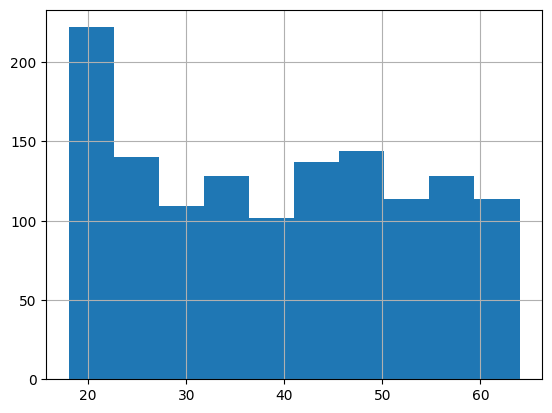

In [82]:
df['age'].hist()

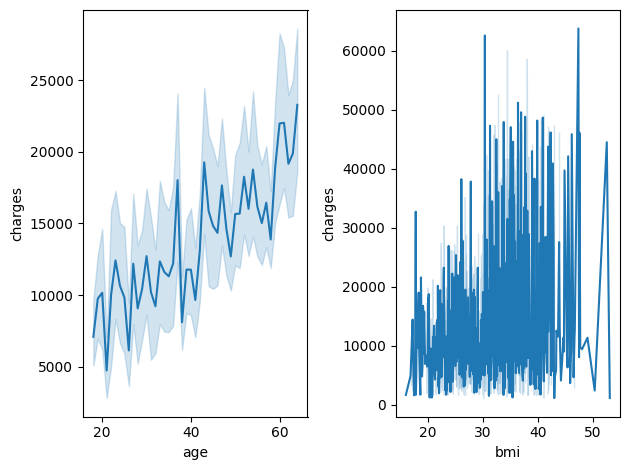

In [84]:
plt.subplot(1,2,1)
sns.lineplot(df, x='age', y='charges')
plt.subplot(1,2,2)
sns.lineplot(df, x='bmi', y='charges')
plt.tight_layout()

In [14]:
# Check duplicate records

df.duplicated().sum()

np.int64(1)

In [15]:
numerical_cols = ['age', 'bmi', 'children', 'charges']

<Axes: >

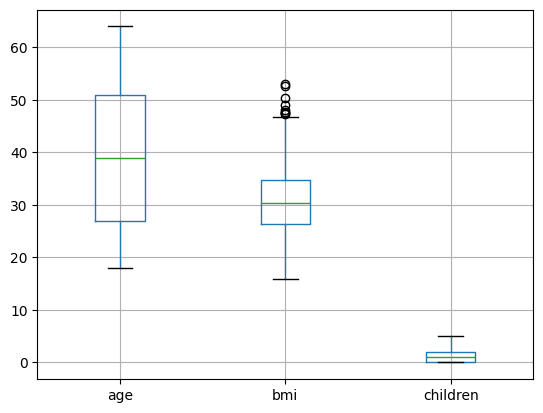

In [19]:
df[['age','bmi','children']].boxplot()

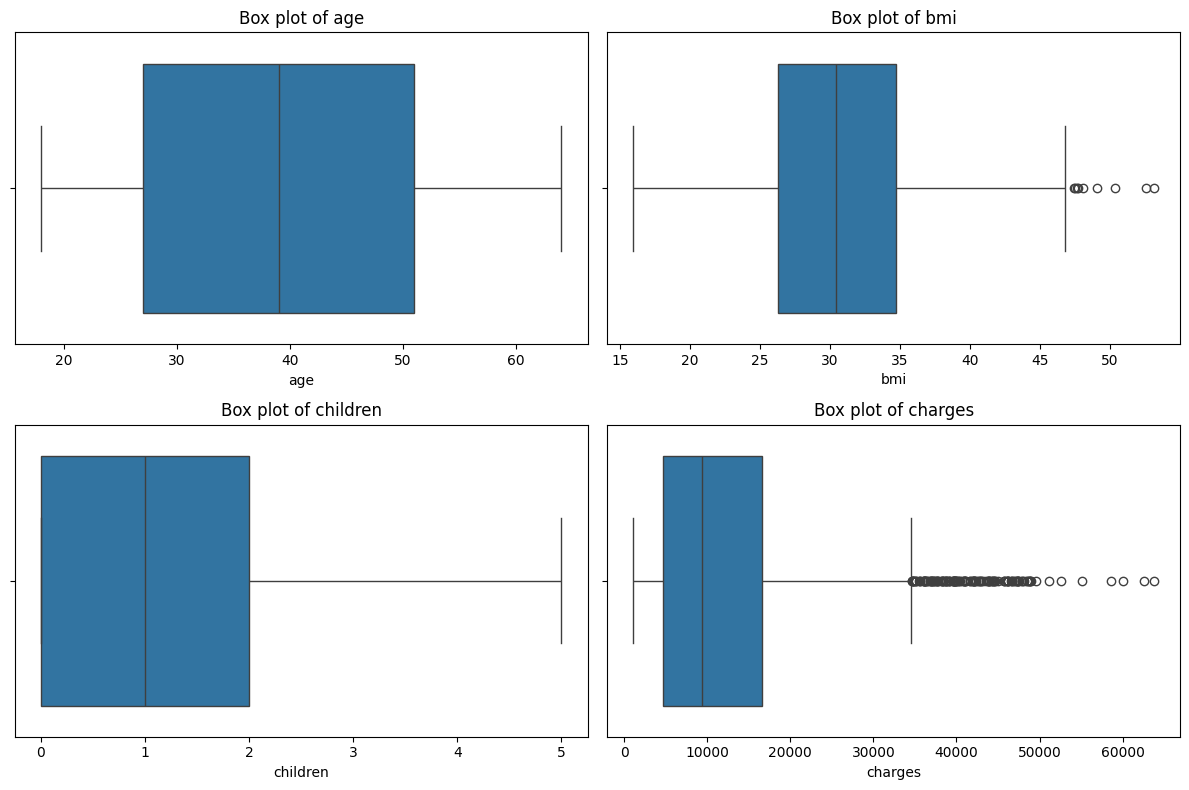

In [20]:
# check outliers
# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Iterate through the numerical columns, calculate Q1, Q3, IQR, lower and upper bounds, and identify outliers for each column using the IQR method.



In [22]:
outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers



In [23]:
for col, outlier_df in outliers.items():
    print(f"Outliers in '{col}':")
    display(outlier_df)

Outliers in 'age':


,age,sex,bmi,children,smoker,region,charges


Outliers in 'bmi':


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


Outliers in 'children':


,age,sex,bmi,children,smoker,region,charges


Outliers in 'charges':


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [24]:
df_no_outliers = df.copy()

In [25]:
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        df_no_outliers = df_no_outliers.drop(outlier_df.index, errors='ignore')


In [26]:
print("Shape of original DataFrame (df):", df.shape)
print("Shape of DataFrame after outlier removal (df_no_outliers):", df_no_outliers.shape)

Shape of original DataFrame (df): (1338, 7)
Shape of DataFrame after outlier removal (df_no_outliers): (1193, 7)


In [27]:
numerical_cols_no_outliers = ['age', 'bmi', 'children', 'charges']

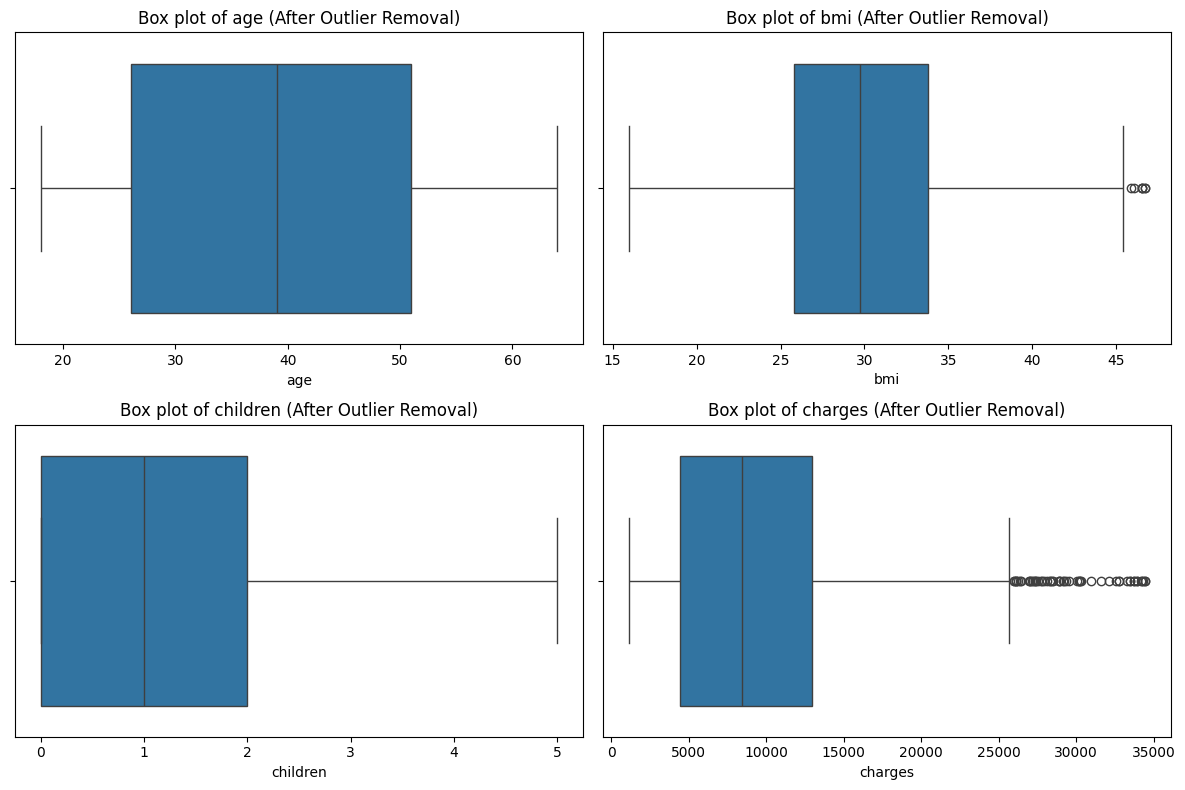

In [28]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols_no_outliers):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Box plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Outliers were identified in the 'bmi' and 'charges' numerical columns using the IQR method. The 'age' and 'children' columns did not contain outliers based on this method.
*   A total of 145 rows were removed from the original DataFrame (shape 1338, 7) to create the new DataFrame without outliers (shape 1193, 7).
*   Box plots were successfully generated for the numerical columns before and after outlier removal, visually demonstrating the effect of the removal process.


In [30]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [31]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [32]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

In [33]:
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


In [34]:
# split data
X = df.drop('charges', axis=1)
y = df['charges']


In [36]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [37]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [38]:
# check correlation using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

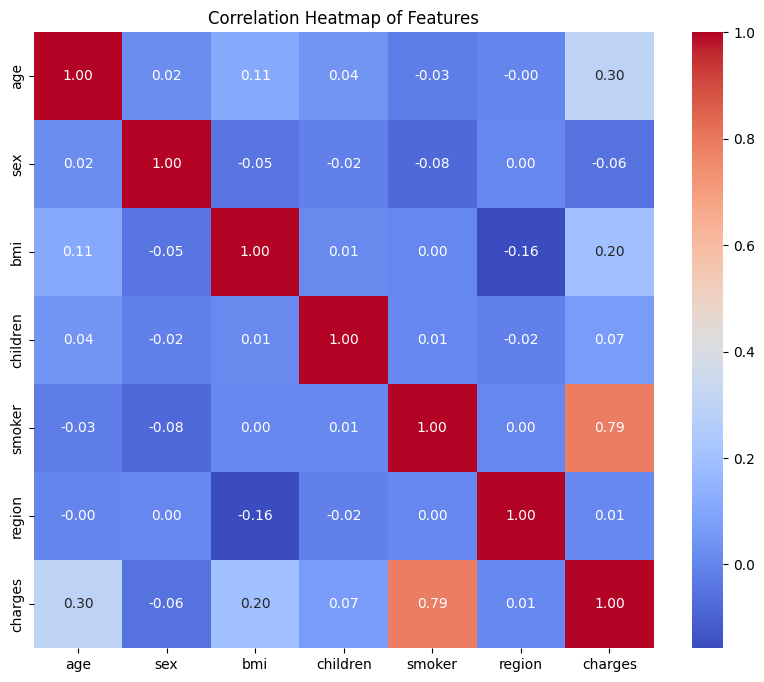

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [42]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

    feature       VIF
2       bmi  8.974743
0       age  7.832033
5    region  2.534044
1       sex  1.918058
3  children  1.799475
4    smoker  1.252796


# Split data into train and test part

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

In [45]:
y_train.shape , y_test.shape

((1070,), (268,))

# Model Training

# Task
Train and evaluate OLS, Linear Regression, SVR, and Random Forest regression models on the dataset and compare their performance.

In [46]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Ordinary Least Squares (OLS) Regression

## What is OLS?
Ordinary Least Squares (OLS) is a method for estimating the parameters of a linear regression model.  
It finds the line (or hyperplane) that minimizes the sum of squared errors between actual and predicted values.

## Linear Model
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

- \(y\): target variable  
- \(x_i\): input features  
- \(\beta_i\): coefficients (parameters)  
- \(\epsilon\): error term  

## Objective (Least Squares)
OLS chooses coefficients \(\beta\) such that:

$$
\min_{\beta}\; \sum_{i=1}^{m} \left(y_i - \hat{y}_i\right)^2
$$

where \(\hat{y}_i\) is the predicted value.

## Closed-Form Solution (Normal Equation)
In matrix form:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

If \(X^\top X\) is not invertible, use the Moore–Penrose pseudoinverse:

$$
\hat{\beta} = X^{+} y
$$

## Key Points
- Provides an exact solution for linear regression when assumptions hold  
- Works well when features are not highly correlated  
- Sensitive to outliers and multicollinearity  
- Basis for advanced models such as Ridge and Lasso regression


In [89]:
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Thu, 28 Aug 2025   Prob (F-statistic):          2.71e-308
Time:                        19:18:09   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.278e+04   1163.461    -10.984      0.0

## LinearRegression

In [49]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [50]:
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

Linear Regression:
Mean Absolute Error: 4186.508898366435
Mean Squared Error: 33635210.431178406
R-squared: 0.7833463107364539


## SVM

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

svr_pipe = Pipeline([('scaler', StandardScaler()),
                     ('svr', SVR())])
svr_pipe.fit(X_train, y_train)
y_pred_svr = svr_pipe.predict(X_test)


In [91]:
print("Support Vector Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R-squared:", r2_score(y_test, y_pred_svr))

Support Vector Regression:
Mean Absolute Error: 8599.328962388287
Mean Squared Error: 165839509.92452022
R-squared: -0.06821813183902203


## RandomForestRegressor

In [54]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [55]:
print("Random Forest Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regression:
Mean Absolute Error: 2502.3999384023327
Mean Squared Error: 21356688.9123809
R-squared: 0.8624356623905003


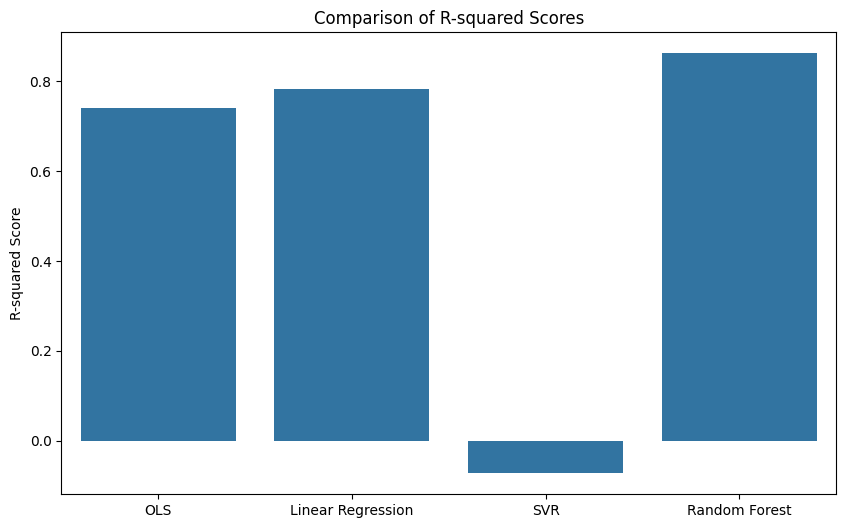

In [56]:
# visulize the r2 score all models

models = ['OLS', 'Linear Regression', 'SVR', 'Random Forest']
r2_scores = [model_ols.rsquared, r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_rf)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.show()

-  Random Forest Regression has the highest R-squared score (around 0.86), indicating that it explains the largest proportion of the variance in the insurance charges compared to the other models.
- Linear Regression also performs reasonably well with an R-squared score of approximately 0.78.
- OLS Regression has a similar R-squared score to Linear Regression, around 0.74.
- Support Vector Regression (SVR) performs poorly with a negative R-squared score, suggesting that it does not fit the data well and performs worse than a simple model that just predicts the mean of the target variable.

In [69]:
model_rf = RandomForestRegressor(min_samples_leaf=5 , max_depth=5 , min_samples_split=5 , verbose=1 , max_samples=25 ,max_features=5 ,max_leaf_nodes=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
print("Random Forest Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regression:
Mean Absolute Error: 5176.361691763185
Mean Squared Error: 56088562.46887045
R-squared: 0.6387180627505318


In [ ]:
# Hyperparameter with Random Forest

In [71]:
model_rf = RandomForestRegressor(min_samples_leaf=10 , max_depth=10 )
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [72]:
print("Random Forest Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regression:
Mean Absolute Error: 2409.1990138975425
Mean Squared Error: 18600507.805184443
R-squared: 0.8801889868828328


In [73]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

model_rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=model_rf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   verbose=2,
                                   scoring='r2',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test)

print("Tuned Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Tuned Random Forest Results:
MAE: 2678.553949327648
MSE: 20177476.900813352
R²: 0.8700312929649764


# Final Conclusion

- The **OLS regression model** achieved an R² of ~0.74, showing a good fit.  
- **Age, BMI, and Smoker** are the strongest predictors of medical charges.  
- Smoking increases medical costs dramatically, by ~23,000 units.  
- **Sex and Region** were not significant predictors and could be dropped.  
- Among machine learning models, **Random Forest** and **SVR** may capture additional non-linear effects, but OLS remains highly interpretable.  

**Takeaway:**  
Interpretability (OLS) and predictive power (tree-based models) both provide valuable insights. For deployment in health policy, OLS is useful for transparency; for accuracy, ensemble methods (like Random Forest) can be considered.
